In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('fraud_detection_dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df[df['nameOrig']=='C20329261']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3139618,236,CASH_OUT,156323.06,C20329261,538.0,0.0,C586082890,0.0,156323.06,0,0


In [18]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [19]:
print(df['isFraud'].value_counts())
print(df['isFraud'].value_counts(normalize=True))

0    6354407
1       8213
Name: isFraud, dtype: int64
0    0.998709
1    0.001291
Name: isFraud, dtype: float64


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


C:\Users\walla\AppData\Local\Temp\ipykernel_11844\1769071899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman').round(2), annot= True)


<AxesSubplot: >

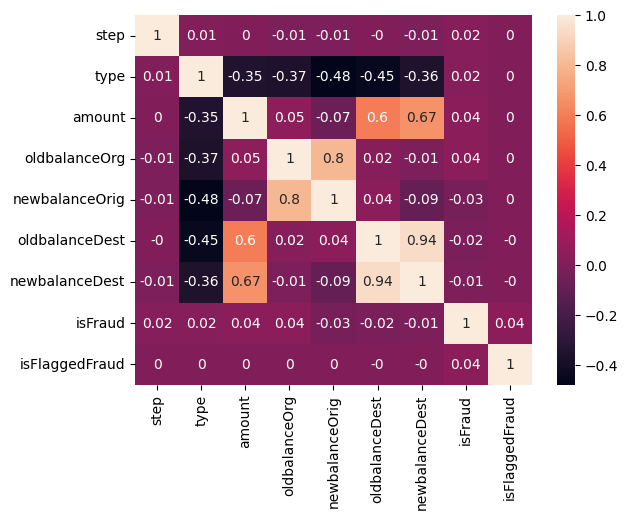

In [21]:
sns.heatmap(df.corr('spearman').round(2), annot= True)

In [22]:
df['delta_balacedOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['delta_balacedDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df.drop(['newbalanceOrig','oldbalanceOrg','newbalanceDest', 'oldbalanceDest']
        , axis= 1,
        inplace=True)
df.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,delta_balacedOrig,delta_balacedDest
0,1,3,9839.64,C1231006815,M1979787155,0,0,-9839.64,0.0
1,1,3,1864.28,C1666544295,M2044282225,0,0,-1864.28,0.0
2,1,4,181.00,C1305486145,C553264065,1,0,-181.00,0.0
3,1,1,181.00,C840083671,C38997010,1,0,-181.00,-21182.0
4,1,3,11668.14,C2048537720,M1230701703,0,0,-11668.14,0.0


In [23]:
df.drop(['nameOrig','nameDest'], axis= 1, inplace=True)
df.head()

,step,type,amount,isFraud,isFlaggedFraud,delta_balacedOrig,delta_balacedDest
0,1,3,9839.64,0,0,-9839.64,0.0
1,1,3,1864.28,0,0,-1864.28,0.0
2,1,4,181.00,1,0,-181.00,0.0
3,1,1,181.00,1,0,-181.00,-21182.0
4,1,3,11668.14,0,0,-11668.14,0.0


In [1]:
from datetime import datetime as dt
from datetime import timedelta as td

data_inicio = dt(2024, 1, 1, 0)
step_final = df['step'].max()
step_inicial = df['step'].min()
datas = [data_inicio]

for i in range(step_inicial, step_final):
    data_inicio += td(seconds=3600)
    datas.append(data_inicio)


df_datas = pd.DataFrame({'dates': datas})
df_datas['step'] = df_datas.index + 1
df_datas['hour'] = df_datas['dates'].dt.hour
df_datas.drop(['dates'], inplace=True, axis=1)

df_datas.head()

NameError: name 'df' is not defined

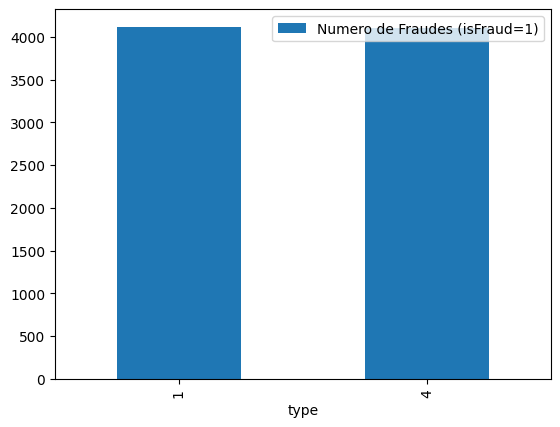

In [74]:
df_2 = pd.merge(df, df_datas, on=['step'], how = 'left')


df_3 = df_2.groupby(['type', 'isFraud']).size().reset_index(name='count')
import matplotlib.pyplot as plt
df_3[df_3['isFraud']==1].plot.bar(x= 'type', y = 'count')
plt.legend(['Numero de Fraudes (isFraud=1)'])


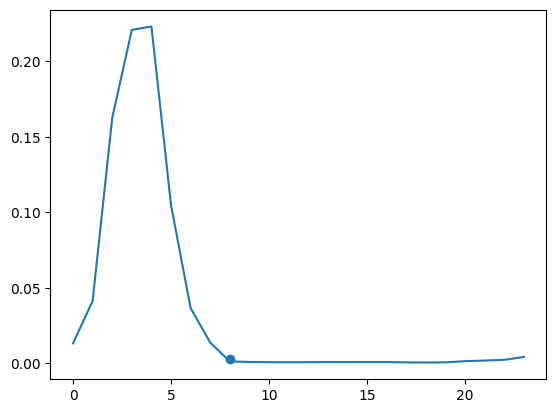

In [151]:
df_5 = df_2.groupby(['hour', 'isFraud']).size().reset_index(name='count')
import numpy as np

pro = np.array(df_5[df_5['isFraud'] == 1]['count']) / np.array(df_5.groupby(['hour']).sum()['count'])

plt.plot(pro)
plt.scatter(x = 8, y = 0.003)


In [153]:
df_horas_classe = pd.DataFrame({'hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                                'hour_class': [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})


df_novas_features = pd.merge(df_5,df_horas_classe,on=['hour'], how='left')

df_novas_features.head(50)

,hour,isFraud,count,hour_class
0,0,0,26753,1
1,0,1,358,1
2,1,0,8646,1
3,1,1,372,1
4,2,0,1681,1
5,2,1,326,1
6,3,0,967,1
7,3,1,274,1
8,4,0,1275,1
9,4,1,366,1


In [24]:
df_features = df.drop('isFraud', axis= 1)
#df_features = df[['distance_from_home', 'distance_from_last_transaction','used_pin_number', 'online_order']]
df_target = df['isFraud']
df_features.head()



,step,type,amount,isFlaggedFraud,delta_balacedOrig,delta_balacedDest
0,1,3,9839.64,0,-9839.64,0.0
1,1,3,1864.28,0,-1864.28,0.0
2,1,4,181.00,0,-181.00,0.0
3,1,1,181.00,0,-181.00,-21182.0
4,1,3,11668.14,0,-11668.14,0.0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.2, shuffle=True, stratify = df_target)


,step,type,amount,isFlaggedFraud,delta_balacedOrig,delta_balacedDest
3567650,260,1,23657.50,0,-1214.00,23657.50
3160565,237,1,99220.87,0,-57189.33,99220.86
3545398,260,1,87586.76,0,-20903.00,87586.76
2502406,204,1,90067.47,0,0.00,90067.48
5764257,400,0,155408.48,0,155408.48,-155408.48


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
categorical_features = ['type', 'isFlaggedFraud']  # Variáveis categóricas
numeric_features = ['amount', 'delta_balacedOrig', 'delta_balacedDest', 'step']

scaler = StandardScaler()

X_train_preprocessed = scaler.fit_transform(X_train[numeric_features])
X_train_continuous_scaled_df = pd.DataFrame(X_train_preprocessed, columns=numeric_features, index=X_train.index)
X_train_normalized = pd.concat([X_train_continuous_scaled_df, X_train[categorical_features]], axis=1)

X_test_preprocessed = scaler.transform(X_test[numeric_features])
X_test_continuous_scaled_df = pd.DataFrame(X_test_preprocessed, columns=numeric_features, index=X_test.index)
X_test_normalized = pd.concat([X_test_continuous_scaled_df, X_test[categorical_features]], axis=1)

#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.transform(X_test)


In [27]:
from imblearn.under_sampling import RandomUnderSampler

smote = RandomUnderSampler()

X_train_normalized_resampled, y_train_resampled = smote.fit_resample(
    X_train_normalized,
    y_train,
    )

y_train_resampled_series = pd.Series(y_train_resampled)
y_train_resampled_series.value_counts()

0    6570
1    6570
Name: isFraud, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

model  = RandomForestClassifier(n_estimators=40,
                             max_depth=10,
                             max_features=0.25)

cv = StratifiedKFold(n_splits= 5)
scores = cross_val_score(model, X_train_normalized_resampled,
                          y_train_resampled, 
                          cv=cv, 
                          scoring='roc_auc')


print(scores.mean())
# Exibe a média e o desvio padrão dos scores

0.9963167411484793


In [29]:
model.fit(X_train_normalized_resampled, y_train_resampled)
y_pred = model.predict(X_test_normalized)


In [30]:
from sklearn.metrics import classification_report, roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(auc.mean())

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270881
           1       0.04      0.97      0.07      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.97      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524

0.9674292336041018
